In [2]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from vega_datasets import data

1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [12]:
df= data.sf_temps()

In [13]:
df.head()

,temp,date
0,47.80,2010-01-01 00:00:00
1,47.40,2010-01-01 01:00:00
2,46.90,2010-01-01 02:00:00
3,46.50,2010-01-01 03:00:00
4,46.00,2010-01-01 04:00:00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [17]:
df.shape

(8759, 2)

In [18]:
#Set 'Date' column as Index and sort the index:

df = df.set_index('date').sort_index()

In [19]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.80
2010-01-01 01:00:00,47.40
2010-01-01 02:00:00,46.90
2010-01-01 03:00:00,46.50
2010-01-01 04:00:00,46.00


In [21]:

df.resample('D').mean().head()

,temp
date,
2010-01-01,49.17
2010-01-02,49.30
2010-01-03,49.39
2010-01-04,49.45
2010-01-05,49.49


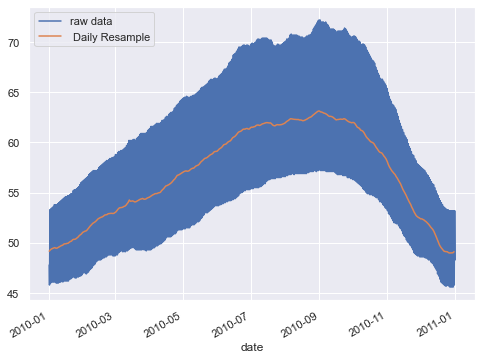

In [22]:
# Plot raw data with daily resampled data

df.temp.plot(label = 'raw data')
df.resample('D').mean().temp.plot(label = ' Daily Resample')
plt.legend()

2. Write the code necessary to visualize the minimum temperature over time.

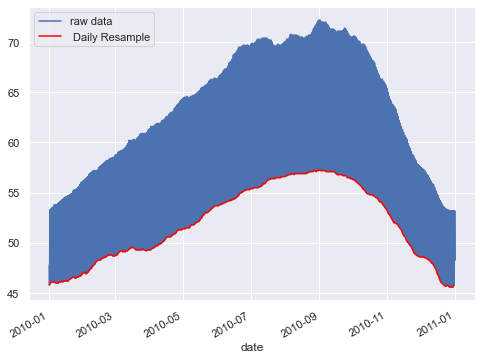

In [29]:
df.temp.plot(label = 'raw data')
df.resample('D').min().temp.plot(label = ' Daily Resample',  color = 'red')
plt.legend()

3. Write the code necessary to visualize the maximum temperature over time.

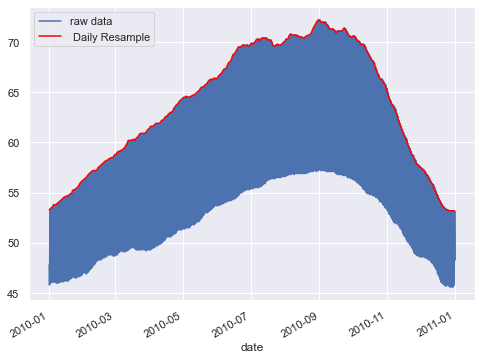

In [27]:
df.temp.plot(label = 'raw data')
df.resample('D').max().temp.plot(label = ' Daily Resample', color = 'red')
plt.legend()

4. Which month is the coldest, on average?

In [37]:
df.resample('M').mean()

,temp
date,
2010-01-31,49.98
2010-02-28,52.24
2010-03-31,53.96
2010-04-30,55.63
2010-05-31,57.97
2010-06-30,60.44
2010-07-31,61.77
2010-08-31,62.41
2010-09-30,62.49


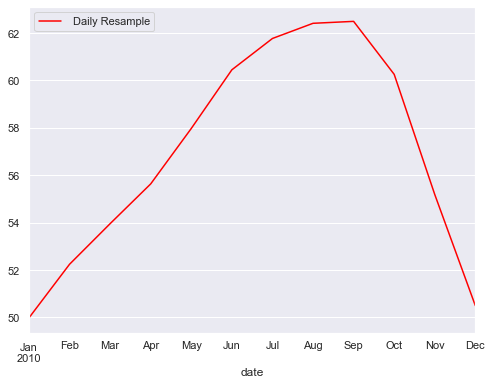

In [40]:
df.resample('M').mean().temp.plot(label = ' Daily Resample', color = 'red')
plt.legend()

In [36]:
df.resample('M').mean().idxmin()

temp   2010-01-31
dtype: datetime64[ns]

5. Which month has the highest average temperature?

In [38]:
df.resample('M').mean().idxmax()

temp   2010-09-30
dtype: datetime64[ns]

6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [43]:
df.resample('D').min().head()


,temp
date,
2010-01-01,45.80
2010-01-02,46.00
2010-01-03,46.10
2010-01-04,46.10
2010-01-05,46.10


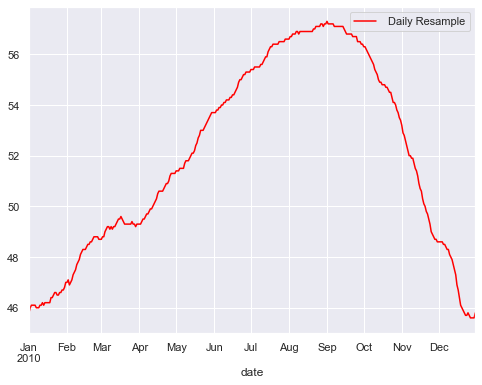

In [42]:
df.resample('D').min().temp.plot(label = ' Daily Resample', color = 'red')
plt.legend()

In [45]:
# create a new column 'diff(1)'
df['diff(1)'] = df.temp.diff(1)
df.head(10)

,temp,diff(1)
date,,
2010-01-01 00:00:00,47.80,nan
2010-01-01 01:00:00,47.40,-0.40
2010-01-01 02:00:00,46.90,-0.50
2010-01-01 03:00:00,46.50,-0.40
2010-01-01 04:00:00,46.00,-0.50
2010-01-01 05:00:00,45.80,-0.20
2010-01-01 06:00:00,45.90,0.10
2010-01-01 07:00:00,45.90,0.00
2010-01-01 08:00:00,46.40,0.50


Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.